# Fraud Detection and Stock Price Forecasting

Gurdeep Panag (30101520)

Harjot Dhaliwal (30051859)

Lukas Escoda (30211208)

Shabbir Khandwala (30219011)

University of Calgary



## Introduction
The primary aim of this project is to delve into two significant areas. The first area focuses on the detection of credit card fraud through the application of various machine learning models and neural networks. The objective here is to methodically compare these models to identify which one offers the most effective performance in recognizing and preventing fraudulent transactions. This comparative analysis will not only highlight the strengths and weaknesses of each model but also help in choosing the best-suited model for deployment in real-world scenarios.

The second area of the project is centered on forecasting the price movements of the NASDAQ index using Recurrent Neural Networks (RNN), particularly Long Short-Term Memory (LSTM) networks. LSTMs are a specialized kind of RNNs renowned for their ability to capture long-term dependencies in time-series data, making them ideal for tasks such as financial forecasting. The project will involve developing a predictive model using LSTM networks and then evaluating its performance by comparing its predictions with the actual historical price data of the NASDAQ index.

The NASDAQ (National Association of Securities Dealers Automated Quotations) is one of the largest and most well-known stock exchanges in the United States, primarily associated with the technology sector. It includes a broad spectrum of more than 3000 companies, ranging from tech giants like Apple and Google to emerging startups. The NASDAQ index is often seen as a key indicator of the health and trends within the tech industry and the broader stock market. By accurately predicting the movements of this index, investors and analysts can gain valuable insights into market trends and make more informed investment decisions.

The results of this project are expected to contribute valuable insights into the effectiveness of advanced machine learning techniques in financial applications, ranging from fraud detection to market prediction. By comparing the outcomes of different models, this project aims to highlight the potential and limitations of current technological approaches in tackling complex issues in the financial domain.

## Dataset

### Fraud Detection Dataset
 The dataset available on Kaggle, titled "Fraud Detection in Credit Card Transactions," is an essential resource for developing and testing credit card fraud detection systems (Yashpal, 2022). This dataset is comprised of transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, where 492 frauds are out of 284,807 transactions. The dataset is highly unbalanced, representing a typical scenario for real-world financial datasets, where fraudulent transactions are much rarer than legitimate ones.

Each transaction in the dataset is described by 31 features, most of which are numerical input variables resulting from a PCA transformation. This was done to protect sensitive information. The features are labeled V1, V2, ..., V28, with 'Time' and 'Amount' being the only features not transformed. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset, while 'Amount' is the transaction amount. The response variable, 'Class', is binary, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent one.

This anonymized and PCA-transformed dataset is widely used by researchers and practitioners to apply machine learning techniques, especially for training models to identify patterns that signify fraudulent activities effectively.
<br>
<br>

### NASDAQ Index Price Dataset
For the second part of our project, focusing on Recurrent Neural Networks (RNN), we will utilize the Yahoo Finance API to extract five years of closing price data for the NASDAQ index. This comprehensive dataset will enable us to develop and refine our predictive model using LSTM networks, aiming to accurately forecast future price movements based on historical trends.

# Fraud Detection

For this segment, we'll leverage a fraud detection dataset to explore a variety of machine learning models, comparing their performances meticulously to ultimately select the most effective one.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import polars as ps
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
dataset = pd.read_csv('creditcard.csv')
dataset.columns = [col.lower() for col in dataset.columns]
display(dataset.head())

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
display(dataset.shape)
# the data has 284807 rows and 31 columns
display(dataset.isna().sum().sum())
# no missing values

(284807, 31)

0

In [ ]:
# Since we are not going to use 'time' column, we are going to drop it
dataset.drop(columns=["time"], inplace=True)

In [ ]:
# Let's Scale the Amount Column
sc = StandardScaler()
dataset.amount = sc.fit_transform(np.array(dataset.amount).reshape(-1,1))

PCA involves finding components along which the variance of the dataset can be explained the most. The aim for PCA is to reduce the dimensions to a certain degree by applying a threshold on the % variance you wish to forego as means to make the model more robust, quicker to converge, and not overfit.

In our situation, since the PCA was already applied onto the dataset transforming the original 28 features to 28 Principal componenets, we use the PCA transformer to understand the % variance explained by each prinicpal component. We have set a threshold for the explained variance to be at least 80%. The first n dimensions that can explain 80%+ of the information within the dataset is what we would be using as features.

In [ ]:
# Applying PCA on features V1 to V28
# While the components will remain exactly the same, it will provide us with the metric: explained_variance_ratio_
# This will provide us with the % variance of the dataset that is explained by the nth principal component.
pca_transform = PCA(n_components=len(dataset.columns) - 2)
pca_transform.fit(dataset.iloc[:,:-2])

# Setting the threshold & selecting the first n components that are able to explain atleast this threshold amount of variance
explained_variance_threshold = 0.8
columns_to_keep = sum(pca_transform.explained_variance_ratio_.cumsum() <= explained_variance_threshold)
print(f"Out of the PCA componenets, we can keep the first {columns_to_keep} as they explain {explained_variance_threshold * 100}% of the variance in the dataset")

# Dropping the remaining columns
dataset.drop(columns=[col for col in dataset.columns if col[0] == "v" and int(col[1:]) > columns_to_keep], inplace=True)
display(dataset.head())

Out of the PCA componenets, we can keep the first 14 as they explain 80.0% of the variance in the dataset


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,-0.073403,0


In [ ]:
# Checking the distribution of the datatypes for any data issues
Counter(dataset.dtypes)

Counter({dtype('float64'): 15, dtype('int64'): 1})

In [ ]:
# Checking for the distribution of class labels
dataset["class"].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

From the above we cells, we realize that the data is numerical across the board, so not further need for preprocessing is required. Having applied scaling and feature reduction, we can proceed with our training.

However, we observe that our dataset is highly skewed, therefore to reduce this to some extent to create a more balanced version of the data ('df') from the original dataset ('dataset'), we aimed at dropping some of the normal transaction from training and testing.

For this, we have defined a ratio, the number of normal transactions for each fraudulent one. We sampled the normal transactions at random, keeping all the fraudulent ones, mainitaining this ratio in order to improve the execution time for training the models.

In [ ]:
# Setting the ratio and seed for reproducibility
normal_to_fraud_ratio = 100
rng = np.random.default_rng(42)

# Choosing the normal transactions at random
normal_tranc_index = rng.choice(dataset[dataset["class"] == 0].index, normal_to_fraud_ratio * sum(dataset["class"] == 1), replace=False)

# Creating our dataset with the specified ratio of normal to fraudulent transactions
df = pd.concat([dataset.iloc[normal_tranc_index], dataset[dataset["class"] == 1]]).reset_index(drop=True)
display(df["class"].value_counts())
display(dataset["class"].value_counts())

class
0    49200
1      492
Name: count, dtype: int64

class
0    284315
1       492
Name: count, dtype: int64

As we observe from the above output, we now have a dataset which is significantly smaller (~50k v/s 280k). We aim at using this dataset for training and testing the models to decide the best model for our business problem before training it on the entire dataset and making decisions about the model that is most appropriate for our investigation

## Train & Test Split

As the dataset is highly skewed we will have to employ some form of stratification in order to prevent our dataset for either training and testing to not have an abundance of fradulent transaction and the other dataset having a dearth of the same.   

In [ ]:
# Defining X and y for train, test split
X = df.iloc[:, :-1]
y = df.iloc[:, -1] # target variable ('class')

# Splitting into Training & Testing - Using 70% for training and 30% for testing
# As the dataset is skewed, we will be stratifying based of the class variable for better results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## General Methodology

For each classification algorithm that we have tested, we have used a similar approach. Some of the parameters of the algorithm are fixed to ensure no overfitting or quicker convergence while the other parameters are tuned for improved accuracy using GridSearch. Scikit Learn provides the GridSearch functionality that sets each possible combination of hyperparameters provided for the classifier, fits the model, tests it using the scoring metric specified after cross-validation, and helps us identify the best set of hyperparameters.

The metric used for our testing is F1 Score, which is the harmonic mean of recall and precision, to combat the model skewness. As the dataset has significantly more number of normal transactions, a model that just classifies each transaction as normal would have been able to achieve 99%+ accuracy.

Precision and Recall are metrics that represent the True Positive Rates with respect to amongst the actual positive class, how many were identified as positive class and amongst those identified as a positive class, how many were correctly identified. A harmonic mean ensures the metric to be between 0 and 1 and gives equal importance to both these characteristics.

As we have a typical binary classification problem at our hand, the various algorithms we can test it against would include:<br>
1. Logistic Regression
2. Support Vector Machines
3. Random Forest, an ensemble of Decision Trees
4. K-Nearest Neighbours.

We compared the best estimator from the GridSearch from each of these four algorithms to identify the best one of them all using the F1 Metric and a confusion matrix that provides us with the true positives and negatives as well as the false positives and negatives.

## Random Forest

First we will employ the Random Forest algorithm, a robust and versatile machine learning method known for its high accuracy in classification tasks. Random Forest operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees. This ensemble method is particularly effective in handling large datasets with a high dimensionality, like our credit card transaction dataset. By utilizing Random Forest, we aim to efficiently identify fraudulent transactions by capturing the complex patterns and anomalies that are indicative of fraud.

Now we will use a grid search with cross-validation to optimize RandomForestClassifier in order to handre potencially imbalanced classification problems, while aiming to maximize the F1 score metric.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

# For Random Forest, our grid search would be testing:
# 1. Criterion: The logic to be used for deciding the best feature for splitting the dataset into two subsets
# 2. Max-Depth: The maximum depth of each of the trees as part of the ensemble classifier
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(1, 11, 1),
    }

# For Random Forest, we set some parameters to prevent overfitting:
# 1. n_estimators: The number of trees the ensemble classifier must be consisting of
# 2. min_samples_split: The minimum number of samples within a node that must be present to split the node further
# 3. min_samples_leaf: The minimum number of samples that must be present in the dataset
# 4. class_weight: Makes the data point's importance be inversely proportional to the frequency with which it's class label occurs.
rf = RandomForestClassifier(n_estimators=100,
                            min_samples_split=len(df) // 1000,
                            min_samples_leaf=len(df) // 10000,
                            class_weight="balanced",
                            random_state=42
                            )

grid = GridSearchCV(rf, param_dist, cv=2, verbose=True, scoring="f1")
grid.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_leaf=4,
                                              min_samples_split=49,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='f1', verbose=True)

In [ ]:
# Getting the best estimator
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Generating the statistics & best parameters
print(f"The model's F1 score is: {f1_score(y_test, y_pred):.4f}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(f"The best number of n_estimators found is: {grid.best_params_}")

The model's F1 score is: 0.8502
--------------------------------------------------------
[[14743    17]
 [   26   122]]
--------------------------------------------------------
The best number of n_estimators found is: {'criterion': 'entropy', 'max_depth': 8}


True Positives (TP): These are cases where the model correctly predicts the positive class. In our context, these are the fraudulent transactions that the model correctly identified. Here, 122 transactions were correctly identified as fraudulent.

True Negatives (TN): These are cases where the model correctly predicts the negative class. Here, these are the legitimate transactions that the model correctly identified as non-fraudulent. In your matrix, 14743 transactions were correctly identified as legitimate.

False Positives (FP): These are cases where the model incorrectly predicts the positive class. In other words, these are the legitimate transactions that were wrongly identified as fraudulent. The matrix shows 17 such transactions.

False Negatives (FN): These are cases where the model incorrectly predicts the negative class. These are the fraudulent transactions that the model failed to catch. According to your matrix, there were 26 such cases

These metrics suggest that the model is quite accurate overall with a good ability to identify fraudulent transactions, although there is some room for improvement in precision to reduce the number of legitimate transactions falsely flagged as fraudulent

## KNN

Now we will implement the K-Nearest Neighbors (KNN) algorithm, a straightforward yet powerful machine learning technique. KNN classifies new cases based on a similarity measure (usually distance functions) with known cases. This method involves identifying the predefined number of training samples closest in distance to the new point, and predicting the label from these.

The next code aims to find the best parameters for KNN in order to improve the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

# For KNN, our grid search would be testing:
# 1. n_neighbors: The number of neighbors to be considered for deciding the label for a particular new data point.
# 2. metric: The manner in which the distance must be computed to find the k nearest neighbours
# 3. weights: Whether the neighbours identified must be given different importance based on their proximity to the new data point or not.
param_dist = {
    'n_neighbors': np.arange(1, 20, 2),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_dist, cv=2, verbose=True, scoring='f1')
grid.fit(X_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=True)

In [ ]:
# Getting the best estimator
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Generating the statistics & best parameters
print(f"The model's F1 score is: {f1_score(y_test, y_pred):.4f}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(f"The best number of n_estimators found is: {grid.best_params_}")

The model's F1 score is: 0.8217
--------------------------------------------------------
[[14756     4]
 [   42   106]]
--------------------------------------------------------
The best number of n_estimators found is: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


True Positives (TP): The model correctly identified 106 fraudulent transactions.

True Negatives (TN): The model correctly identified 14756 legitimate transactions.

False Positives (FP): The model incorrectly labeled 4 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 42 fraudulent transactions.

## Logistic Regresion

We will utilize Logistic Regression as a method for detecting credit card fraud. This statistical model predicts the probability of a categorical dependent variable— in this case, fraudulent or non-fraudulent transactions—based on one or more predictor variables. It works well for binary classification tasks and is valued for its simplicity and efficiency in providing probabilistic predictions. Logistic Regression is particularly useful in our context as it allows for easy interpretation of the influence of each feature on the likelihood of a transaction being fraudulent. We will fine-tune this model to optimize its performance on our unbalanced dataset, aiming to achieve high accuracy in identifying fraudulent activities.

Gridsearch to find the best parameters for the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

# For Logstict Regression, our grid search would be testing:
# 1. C: The regularization constant, it provides the weightage for the amount of L1 (Lasso) and L2 (Ridge) Regularization.
# 2. solver: The logic that must be used to converge to the optimum solution
# 3. l1_ratio: It allows us to cover the scenario: Apply Lasso only, Apply equal weightage Lasso and Ridge, Apply Ridge only
param_dist = {
    "C": 100 / 10 ** np.arange(1, 6),
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "l1_ratio": [0, 0.5, 1]
}

# For Logstict Regression, we set some parameters:
# 1. fit_intercept: To allow the use of Beta0, the intercept within the equation
# 2. max_iter: The maximum number of iterations that the logic can run for to converge onto the optimum solution
# 3. class_weight: Makes the data point's importance be inversely proportional to the frequency with which it's class label occurs.
logistic = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=42, class_weight="balanced")

grid = GridSearchCV(logistic, param_dist, cv=2, verbose=True, scoring='f1')
grid.fit(X_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
                         'l1_ratio': [0, 0.5, 1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=True)

In [ ]:
# Getting the best estimator
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Generating the statistics & best parameters
print(f"The model's F1 score is: {f1_score(y_test, y_pred):.4f}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(f"The best number of n_estimators found is: {grid.best_params_}")

The model's F1 score is: 0.5122
--------------------------------------------------------
[[14542   218]
 [   22   126]]
--------------------------------------------------------
The best number of n_estimators found is: {'C': 0.001, 'l1_ratio': 0, 'solver': 'lbfgs'}


True Positives (TP): The model correctly identified 126 fraudulent transactions.

True Negatives (TN): The model correctly identified 14542 legitimate transactions.

False Positives (FP): The model incorrectly labeled 218 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 22 fraudulent transactions.

## SVM

Now we will use Support Vector Machine (SVM) algorithm into our analysis. SVM is a powerful and versatile machine learning technique, widely used for classification tasks. It works by finding the hyperplane that best separates the classes in the feature space, maximizing the margin between the closest points of the classes, which are known as support vectors. This characteristic makes SVM highly effective in handling complex and high-dimensional data. We will utilize SVM to differentiate between fraudulent and legitimate transactions, tuning its parameters to adapt to the unique challenges posed by our unbalanced dataset. This will involve adjusting the kernel type and regularization parameter to optimize the model's sensitivity and specificity in fraud detection

Gridsearch for best parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score

# For SVM, our grid search would be testing:
# 1. C: The regularization constant, it provides the weightage for L2 (Ridge) Regularization.
# 2. kernel: The shape of the decision boundary
param_dist = {
    "C": 100 / 10 ** np.arange(1, 6),
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# For Logstict Regression, we set some parameters:
# 1. max_iter: The maximum number of iterations that the logic can run for to converge onto the optimum solution
# 2. class_weight: Makes the data point's importance be inversely proportional to the frequency with which it's class label occurs.
svm = SVC(max_iter=1000, random_state=42, class_weight="balanced")

random_search = GridSearchCV(svm, param_dist, cv=2, verbose=True, scoring='f1')
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


GridSearchCV(cv=2,
             estimator=SVC(class_weight='balanced', max_iter=1000,
                           random_state=42),
             param_grid={'C': array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='f1', verbose=True)

In [ ]:
# Getting the best estimator
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Generating the statistics & best parameters
print(f"The model's F1 score is: {f1_score(y_test, y_pred):.4f}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(f"The best number of n_estimators found is: {grid.best_params_}")

The model's F1 score is: 0.5122
--------------------------------------------------------
[[14542   218]
 [   22   126]]
--------------------------------------------------------
The best number of n_estimators found is: {'C': 0.001, 'l1_ratio': 0, 'solver': 'lbfgs'}


True Positives (TP): The model correctly identified 126 fraudulent transactions.

True Negatives (TN): The model correctly identified 14542 legitimate transactions.

False Positives (FP): The model incorrectly labeled 218 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 22 fraudulent transactions.

Amongst the above different models, the most appropriate model based on the F1 Score is the Random Forest with an F1 score of ~85%. One thing to highlight here is that the model is still having a 99%+ accuracy and so would all these other options have but the missclassification of records is appropriately penalized more in F1 score.

We do wish to highlight that while in our investigation we used the F1 score as our scoring mechanism and chose the model based on that, however, choosing another metric might make the choice of best model different. For example, if the bank is concerned about loss prevention, one might think the SVM or Logistic Regression are better options as they have the least false negative rate. On the other hand, if the bank is concerned about not raising false alarms, KNN might be the best one as it has the least false positive rate.

For our study, we gave equal weightage to both, and given the skew in the dataset, the appropriate choice of metric was the F1 Score.

## ANN

Now we will use Artificial Neural Networks (ANN) to enhance our credit card fraud detection capabilities. ANNs are inspired by the biological neural networks that constitute animal brains, and they are particularly effective for pattern recognition tasks due to their ability to learn and model non-linear and complex relationships between inputs and outputs. By using a multi-layered structure of neurons, ANNs can discern subtle patterns in data that might indicate fraudulent activities. We will design and train an ANN model, optimizing its architecture—number of layers, neurons per layer, activation functions, and more—to effectively identify fraudulent transactions amidst our highly unbalanced dataset. This approach aims to leverage the deep learning strengths of ANNs to improve the accuracy and reliability of our fraud detection system.

ANNs are composed of:

Input layer: Where we enter our data.

Hidden layers: Intermediate layers where information is processed.

Output layer: Where we obtain the prediction or desired result.

Weights in Artificial Neural Networks are parameters that determine the strength and direction of connections between neurons. Each connection between neurons has an associated weight that controls the contribution of the input neuron to the output neuron.


How the process works

The ANN works on the data based on the inputs we give it to finally make its predictions in the output layer. These predictions are compared to the actual results based on a cost function, which basically measures the differences between the predictions and the actual values. Once these calculations have finished, the information is sent back to the beginning of the neural network in a process called 'backpropagation' in which the weights of the connections between the neurons are adjusted and the process is carried out again in order to reduce the cost function. This process is performed several times until the cost function is 0 or as small as possible.

Advantages and Challenges:

Advantages: ANNs can learn complex patterns and adapt to new data. They can detect fraud quickly and efficiently.

Challenges: Require large amounts of data to train correctly. Additionally, they can be difficult to interpret, which can be a problem in regulatory environments. Deep learning tends to work better with large amounts of data than machine learning models.

Activation functions in artificial neural networks (ANNs) serve a crucial role in determining the output of each neuron. They introduce non-linearities to the model, enabling it to learn complex patterns in the data. ReLU (Rectified Linear Unit) is commonly used in hidden layers because it is computationally efficient and helps mitigate the vanishing gradient problem during training. ReLU simply outputs the input if it's positive, otherwise, it outputs zero. On the other hand, the sigmoid function is often employed in the output layer, especially for binary classification tasks like fraud detection, because it squashes the output between 0 and 1, effectively representing probabilities. This makes it suitable for predicting binary outcomes, where values closer to 1 indicate a higher probability of fraud, while values closer to 0 indicate the opposite.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, confusion_matrix

# We will create a ANN with 2 hidden layers (of 6 neurons each) and only one output layer (since this is a binary classification problem)
# We selected this model architecture after experimenting with various configurations; this particular setup yielded the most favorable outcomes without overly complicating
# the artificial neural network (ANN).
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# Once we have created the architecture of the neural network, we set the parameters for the logic to be used for solving and our choice of loss function
ann.compile(optimizer='adam', loss='binary_crossentropy')

# We train the ANN
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=False)

# As the ANN provides a probability of a data point belonging a certain class, we apply a threshold to identify the class
threshold = 0.5
y_pred_prob = ann.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

# Generating the statistics
print(f"F1-score: {f1_score(y_test, y_pred)}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))

466/466 [==============================] - 1s 1ms/step
F1-score: 0.8551236749116607
--------------------------------------------------------
[[14746    14]
 [   27   121]]


True Positives (TP): The model correctly identified 121 fraudulent transactions.

True Negatives (TN): The model correctly identified 14,746 legitimate transactions.

False Positives (FP): The model incorrectly labeled 14 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 27 fraudulent transactions.

### Oversampling & Finding the Best Model

To address the problem of class imbalance in the target variable of our dataset, we have applied the Synthetic Minority Over-sampling Technique, or SMOTE. This method helps to balance the classes by generating synthetic examples of the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and creating new examples along that line. This approach helps to avoid overfitting that can occur with simple over-sampling and allows the model to learn more robust patterns, improving its performance on new, unseen data. By using SMOTE, we ensure a more balanced dataset, which is crucial for building effective and unbiased machine learning models such as the K-nearest neighbors (KNN) classifier used in this case

It's crucial to emphasize that we will be applying this to the original dataset with PCA applied, denoted as 'dataset', rather than to 'df' as the 'dataset' has the true ratio of normal to fraud transactions.

In [ ]:
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features and labels
X, y = dataset.drop(columns=['class']), dataset['class']

# Applying SMOTE to resample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a dataframe with balanced class labels
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['class'])], axis=1)

# Splitting into Training & Testing - Using 70% for training and 30% for testing
X, y = balanced_df.drop(columns=['class']), balanced_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

display(balanced_df.head())

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,-0.073403,0


In [ ]:
# Demonstrating the elimination of skew within our dataset
print(balanced_df.shape)
print(balanced_df['class'].value_counts())

(568630, 16)
class
0    284315
1    284315
Name: count, dtype: int64


As observed here, SMOTE ensures that both fraudulent and non-fraudulent transactions maintain equal proportions. Let's test this new balanced dataset against the best model from our investigation of 4 models and our deep learning model, ANN.

## Random Forest with SMOTE

Since Random Forest proved to be our best model, we will apply this technique to improve it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

# With SMOTE, we might just want to use the default hyperparameters for those we set static
# With the elimination of skew using SMOTE, we are able to eliminate any causes for overfitting arising from skew in the dataset
best_model = RandomForestClassifier(criterion='entropy', max_depth=8)

best_model.fit(X_train, y_train)

# Getting the best estimator
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Generating the statistics & best parameters
print(f"The model's F1 score is: {f1_score(y_test, y_pred):.4f}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(f"Model parameters set to: criterion=entropy, max_depth=8")

The model's F1 score is: 0.9755
--------------------------------------------------------
[[84959   336]
 [ 3767 81527]]
--------------------------------------------------------
Model parameters set to: criterion=entropy, max_depth=8


True Positives (TP): The model correctly identified 84,959 fraudulent transactions.

True Negatives (TN): The model correctly identified 81,527 legitimate transactions.

False Positives (FP): The model incorrectly labeled 336 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 3767 fraudulent transactions, meaning it caught every single fraud instance.

## ANN with SMOTE

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, confusion_matrix

# We will create a ANN with 2 hidden layers (of 6 neurons each) and only one output layer (since this is a binary classification problem)
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# Once we have created the architecture of the neural network, we set the parameters for the logic to be used for solving and our choice of loss function
ann.compile(optimizer='adam', loss='binary_crossentropy')

# We train the ANN
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=False)

# As the ANN provides a probability of a data point belonging a certain class, we apply a threshold to identify the class
threshold = 0.5
y_pred_prob = ann.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

# Generating the statistics
print(f"F1-score: {f1_score(y_test, y_pred)}")
print("--------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))

5331/5331 [==============================] - 6s 1ms/step
F1-score: 0.9842786092749821
--------------------------------------------------------
[[83078  2217]
 [  492 84802]]


True Positives (TP): The model correctly identified 83,078 fraudulent transactions.

True Negatives (TN): The model correctly identified 84,802 legitimate transactions.

False Positives (FP): The model incorrectly labeled 492 legitimate transactions as fraudulent.

False Negatives (FN): The model failed to detect 2217 fraudulent transactions, meaning it caught every single fraud instance.

## Conclusion

In our project, we've leveraged various machine learning models alongside a deep learning architecture (Artificial Neural Network, ANN). Upon analyzing the results, we found that the most effective machine learning model was Random Forest, boasting an impressive F1 score of 85.02%. Comparatively, the ANN achieved an F1 score of 85.51%, positioning at the same level of Random Forest. As we can see, deep learning models tend to perform better than machine learning models if they are fed with the correct amount of data, but Random Forest still achieved almost the same performance.

Our final recommendation is that for fraud detection, the best models to use are ANN and Random Forest. In cases where we have extensive data available, we recommend using ANN, as deep learning models tend to yield better results than machine learning models in these scenarios. However, in cases where data availability is limited, we recommend utilizing machine learning models, particularly Random Forest or KNN, as they have shown to deliver superior results. Additionally, Random Forest, being a tree-based ensemble method, it might provide better interpretability while explaining what features are important which the ANN wouldn't be able to explain.

# RNN

In this analysis, we embark on constructing a robust predictive tool for the NASDAQ, utilizing historical data from the past five years. Our objective is to not only capture the intricacies of NASDAQ trends but also to project them into the future, specifically targeting price trends for March 2024.

To accomplish this, we employ a Recurrent Neural Network (RNN), a deep learning architecture that excels in modeling sequences and temporal patterns in time-series data such as stock market trends. More specifically, we utilize Long Short-Term Memory (LSTM) units within our RNN. LSTMs are designed to effectively handle long-term dependencies in sequential data, making them particularly suited for our purposes.

The choice of LSTMs over traditional models like ARIMA is motivated by their ability to capture non-linear relationships and adapt to complex patterns in data, which are essential qualities for modeling the dynamics of the stock market. By feeding the RNN a sequence of historical price data, including the closing prices and trading volumes, the network learns to discern temporal patterns that influence market behavior.

Throughout the training phase, the RNN adjusts its internal parameters to minimize the discrepancy between its predictions and the actual stock prices observed in the dataset. This optimization is achieved using algorithms such as gradient descent, focusing specifically on the closing price of the NASDAQ index over the last five years.

Our approach aims not only to forecast the overall direction of the NASDAQ for the upcoming month but also to enhance our understanding of how neural networks can be effectively applied to financial time series forecasting. This deep analysis of NASDAQ trends allows us to grasp the complex underlying interactions and subtle changes that might be easily overlooked by simpler analytical methods, thereby providing a more comprehensive prediction of future market behavior.

For extract the data, we will use the yahoo finance API for training the RNN

In [ ]:
# Import the data for trainig the model
import yfinance as yf

# Setting the ticker value for whom the data needs to be scrapped
nasdaq_ticker = "^IXIC"
nasdaq = yf.Ticker(nasdaq_ticker)

# Setting the interval
start_date, end_date = "2019-01-01", "2024-02-29"

# Extracting data for this interval from Yahoo Finance regarding the closing price
close_prices = nasdaq.history(start=start_date, end=end_date)['Close']
print(close_prices.head())
print(close_prices.tail())

Date
2019-01-02 00:00:00-05:00    6665.939941
2019-01-03 00:00:00-05:00    6463.500000
2019-01-04 00:00:00-05:00    6738.859863
2019-01-07 00:00:00-05:00    6823.470215
2019-01-08 00:00:00-05:00    6897.000000
Name: Close, dtype: float64
Date
2024-02-22 00:00:00-05:00    16041.620117
2024-02-23 00:00:00-05:00    15996.820312
2024-02-26 00:00:00-05:00    15976.250000
2024-02-27 00:00:00-05:00    16035.299805
2024-02-28 00:00:00-05:00    15947.740234
Name: Close, dtype: float64


Here we can see the index evolution from the last 5 years

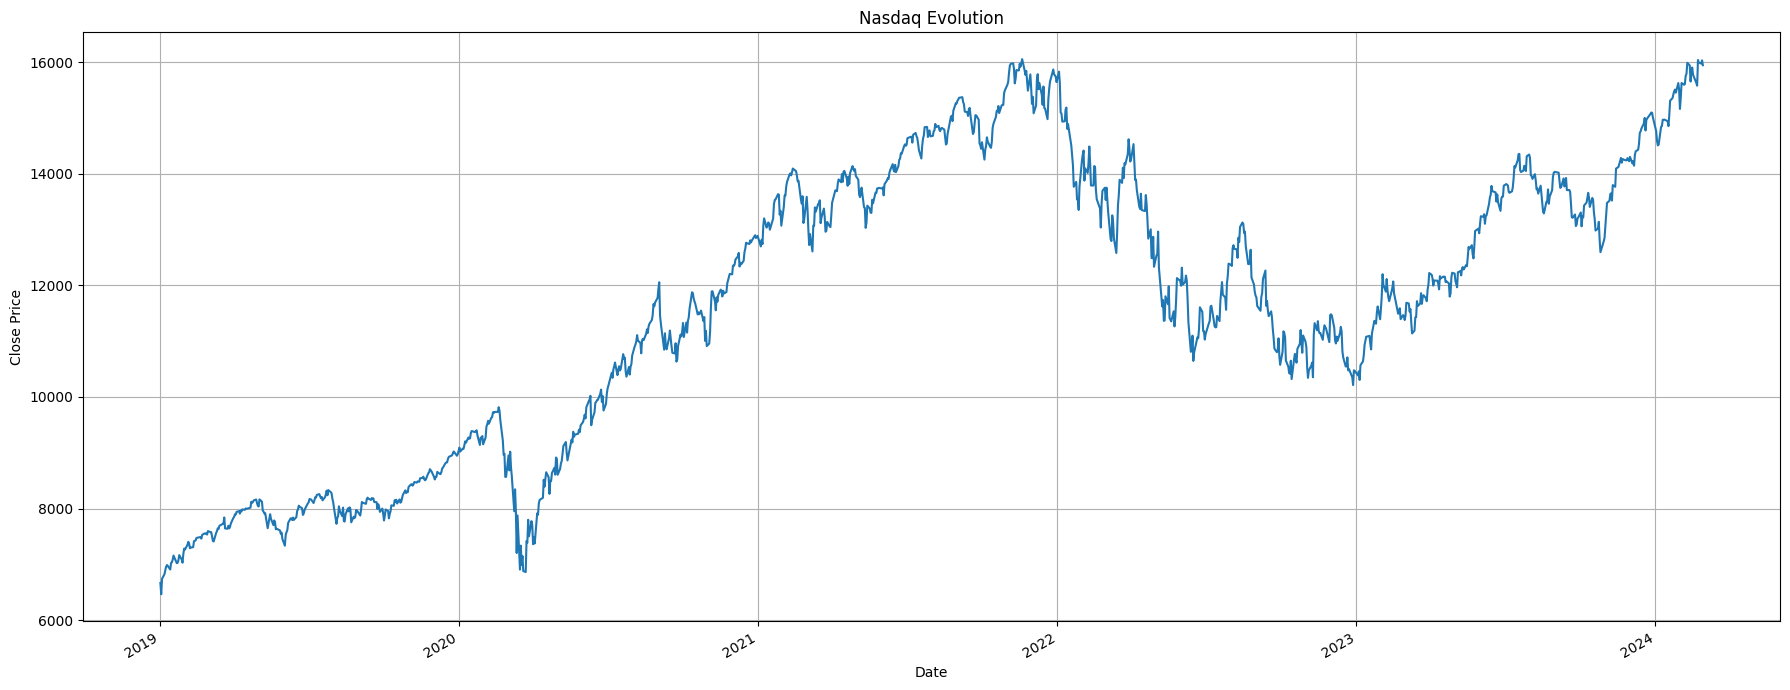

In [ ]:
# Plotting the closing price over time
plt.figure(figsize=(18,7))
close_prices.plot()
plt.title("Nasdaq Evolution")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()

In [ ]:
# Training set
# We will transform the training data to numpy array
training_set = close_prices.reset_index().iloc[:,1:2].values

## Feature Scaling

To increase the performance of a neural network, it is important to scale the data

In [ ]:
# For getting better results, we have to scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1298, 1)

## Now we will create a data structure with 60 timesteps and 1 output

- This is the most important step when building a RNN
- This structure specifies what the RNN must remember to predict the next stock price.
- An incorrect number of timestep can lead to underfitting or overfitting
- There is no a correct number, so we are going to test with 60

What does a 60 timestep means?

It means that at each time t the RNN will observe 60 stock prices before that time t (that is, 60 days before t and t), and based on the trend it captures between these 60 days, it will try to predict the next output (which would be the following day)

60 timesteps is the past information that the RNN will use to learn, and based on that it will try to predict the next output

In [ ]:
# X_train will have the 60 previous days to that "t" day
# y_train will have the next day price to that "t" day
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0]) # Here I am taking the values from i minus 60, up to i. In the first example I take from day 0 to 60 (actually it is 59 due to the Python language)
    y_train.append(training_set_scaled[i, 0]) # Day i

X_train, y_train = np.array(X_train), np.array(y_train) # Here we convert to numpy array
# Basically what you are doing here is that for x_train you add 0 to 59 and for y_train the value 60, and so on for the rest

## Reshaping

- Here we are going to add more dimensions to the structure we already have (X_train)
- This dimension that we are going to add is unity (the number of predictors that we can use to predict what we want to predict, which in this case is the price of the stock at time t+1)
- In this problem, the predictors are indicators. For now we have a single indicator which is the closing price (the one we have been using), in which we take the 60 prices to predict the next
- Thanks to this new dimension that we are going to add to our structure, we will be able to add more indicators if we believe that it can help even more to predict what we want (for now we will only use the close price)

In [ ]:
# For now X_train only has 2 dimensions
X_train = np.reshape(X_train, # this is what we want to reshape
                     (X_train.shape[0],X_train.shape[1],
                      1)) # This is the new shape we want our numpy array to have. It has 3 arguments: No. of observations, No. of timesteps, and the No. of indicators that we will have (in our case it is 1, which is the close price)

Now we have a numpy array with 3 dimensions

The first one is the number of stock prices

The second is the number of timesteps (60 in our case)

The third is the number of indicators (in our case is 1, the closing price)

In [ ]:
X_train.shape

(1238, 60, 1)

## Building and training the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Now we are going to ass the first LSTM layer and Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50, # number of neurons in LSTM
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 1))) # Las two dimensions

regressor.add(Dropout(0.2)) # This is to avoid Overfitting. 0.2 is to remove 20% of the neurons in the layer. This is a commonly used number. 20% of the neurons will be ignored in training (forward and back propagation)

### Now we are going to add a second LSTM layer and Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Third Layer

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Fourth Layer

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Output Layer

In [ ]:
# Since we are predicting the price, we need only one output layer
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam',
                  loss = 'mean_squared_error')

### Fitting the RNN to the training set

In [ ]:
regressor.fit(X_train,
              y_train,
              epochs = 100, # number of iterations
              batch_size = 32) # 32 stock prices for each iteration

Epoch 1/100
39/39 [==============================] - 10s 84ms/step - loss: 0.0493
Epoch 2/100
39/39 [==============================] - 3s 85ms/step - loss: 0.0082
Epoch 3/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0082
Epoch 4/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0069
Epoch 5/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0067
Epoch 6/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0065
Epoch 7/100
39/39 [==============================] - 3s 86ms/step - loss: 0.0059
Epoch 8/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0061
Epoch 9/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0055
Epoch 10/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0058
Epoch 11/100
39/39 [==============================] - 3s 85ms/step - loss: 0.0050
Epoch 12/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0048
Epoch 13/100
39/39 [====

## Making the predictions and visualizing the results

For testing, we are going to use data from march 2024, create the prediction and then compare it with the actual data

In [ ]:
import yfinance as yf

nasdaq_ticker = "^IXIC"
nasdaq = yf.Ticker(nasdaq_ticker)
start_date = "2024-03-01"
end_date = "2024-03-31"
historical_data = nasdaq.history(start=start_date, end=end_date)
close_prices_test = historical_data['Close']
print(close_prices_test)

Date
2024-03-01 00:00:00-05:00    16274.940430
2024-03-04 00:00:00-05:00    16207.509766
2024-03-05 00:00:00-05:00    15939.589844
2024-03-06 00:00:00-05:00    16031.540039
2024-03-07 00:00:00-05:00    16273.379883
2024-03-08 00:00:00-05:00    16085.110352
2024-03-11 00:00:00-04:00    16019.269531
2024-03-12 00:00:00-04:00    16265.639648
2024-03-13 00:00:00-04:00    16177.769531
2024-03-14 00:00:00-04:00    16128.530273
2024-03-15 00:00:00-04:00    15973.169922
2024-03-18 00:00:00-04:00    16103.450195
2024-03-19 00:00:00-04:00    16166.790039
2024-03-20 00:00:00-04:00    16369.410156
2024-03-21 00:00:00-04:00    16401.839844
2024-03-22 00:00:00-04:00    16428.820312
2024-03-25 00:00:00-04:00    16384.470703
2024-03-26 00:00:00-04:00    16315.700195
2024-03-27 00:00:00-04:00    16399.519531
2024-03-28 00:00:00-04:00    16379.459961
Name: Close, dtype: float64


In [ ]:
close_prices_test.reset_index().iloc[:,1:2]

,Close
0,16274.940430
1,16207.509766
2,15939.589844
3,16031.540039
4,16273.379883
5,16085.110352
6,16019.269531
7,16265.639648
8,16177.769531
9,16128.530273


In [ ]:
test_set = close_prices_test.reset_index().iloc[:,1:2].values

Here we have nasdaq value for march 2024, the data that we want to predict

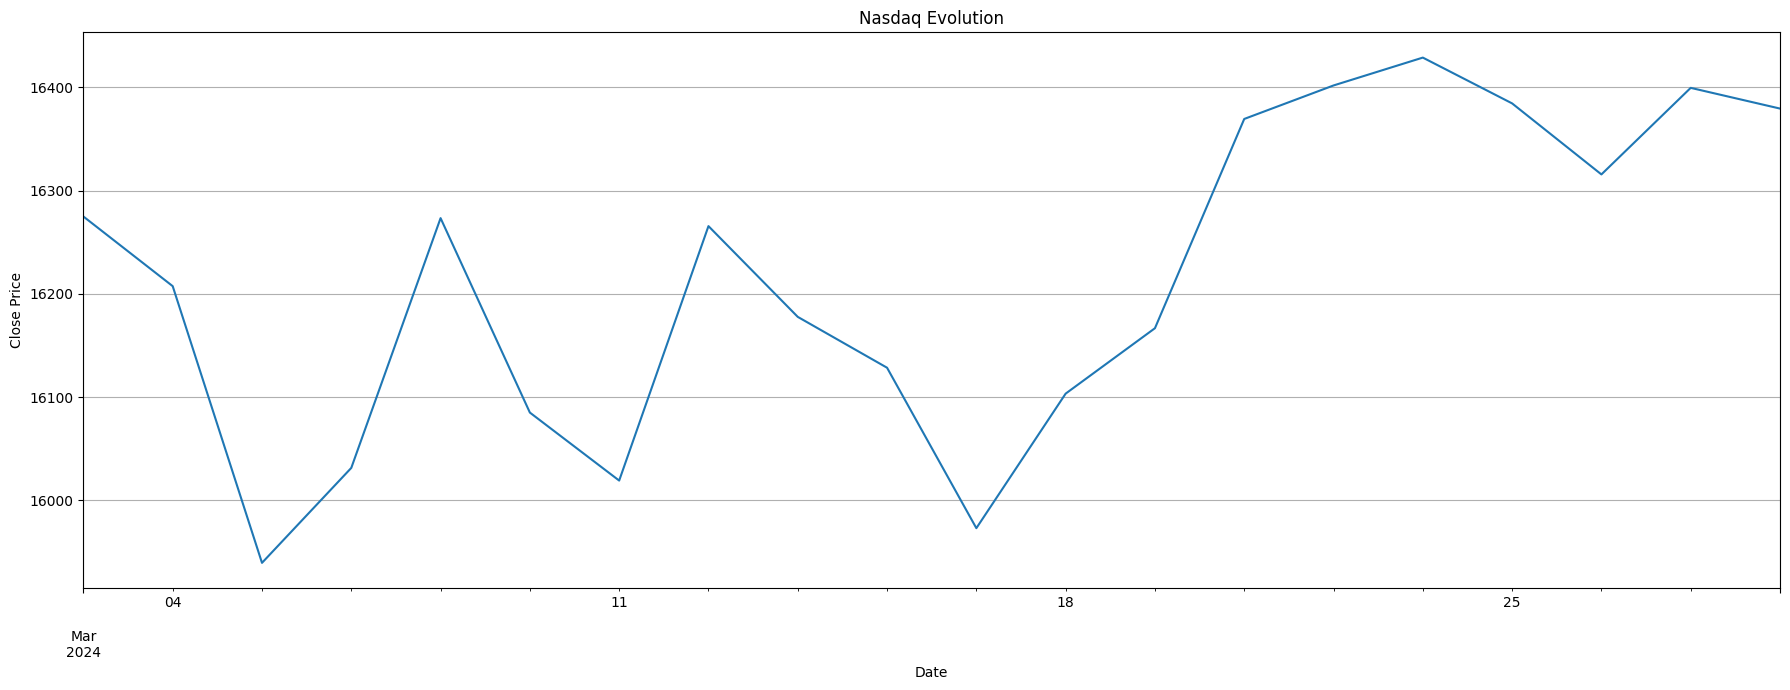

In [ ]:
plt.figure(figsize=(18,7))
close_prices_test.plot()
plt.title("Nasdaq Evolution")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()

### Predicting March 2024

- The first important point is that to predict the price of day t, I need the 60 prices prior to that day t
- To have the previous 60 days we will need the training and testing set, since we will need some of the 60 days of the training set and we will also need stock prices of the testing set
- We need to concatenate the training and testing set to have the necessary days
- We need to make a special concat, since the training set is scaled and the test set is not, and 'we cannot scale the test set', since we need the values as they are to make the predictions
- We have to concatenate the original data and with this concatenation we will have the inputs of each prediction (the 60 days prior to day t), and that will be what we will scale, this way we will only scale the inputs and not the values of the testing set
- In summary `we have to scale the inputs values`

In [ ]:
dataset_total = pd.concat((close_prices.reset_index().iloc[:,1:2]['Close'], close_prices_test.reset_index().iloc[:,1:2]['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(close_prices_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


Visualising the results

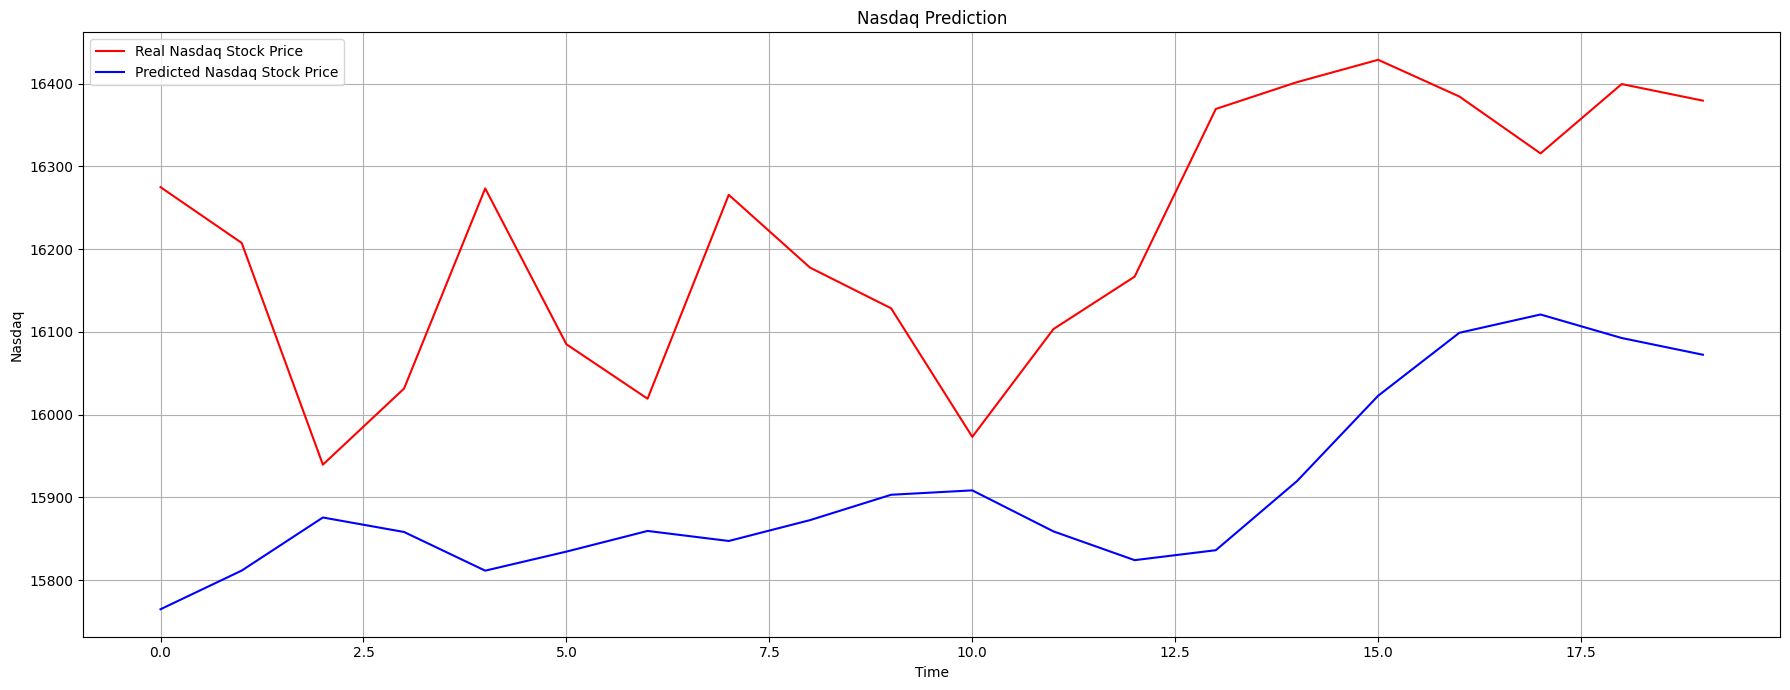

In [ ]:
plt.figure(figsize=(18,7))
plt.plot(test_set, color = 'red', label = 'Real Nasdaq Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Nasdaq Stock Price')
plt.title('Nasdaq Prediction')
plt.xlabel('Time')
plt.ylabel('Nasdaq')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As we can see in the results, we have the model prediction for March 2024 and the real values for March 2024. Although the model does not make a very precise prediction of the price (something extremely difficult to achieve, and also taking into consideration that we only use one variable as information for this model), we can see that it does a good job capturing the general trend of the index, in particular on the tenth day of March, so we are satisfied with the results of this model, despite the complexity of the problem

## Conclusion

In conclusion, it is important to emphasize that this type of model serves to predict the trend of future prices rather than the price itself. Based on the results, we believe the model performed well when compared to real data, especially considering that we only used a single input variable. Therefore, we recommend incorporating more input variables in the future to potentially achieve even better results.

# References

Yashpal 2022, Fraud Detection - Credit Card, Kaggle, https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card

yfinance. (2024) finance pypi. https://pypi.org/project/yfinance/